In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
print(y.shape)  # 1 x 10000
print(tx.shape) # 10000 x 2
#print(y)
#print(tx)

(10000,)
(10000, 2)


# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
A = np.array([[2.0,1.0],[4.0,5.0]])
B = np.array([[2.0,1.0],[4.0,5.0]])
C = np.array([1.0, 2.0])
print(np.dot(A,B))
print(np.multiply(A,B))
print(np.dot(A,C)) #un vecteur ligne est automatiquement bien orienté pour la multiplication
print(np.dot(A,np.transpose(C)))

[[  8.   7.]
 [ 28.  29.]]
[[  4.   1.]
 [ 16.  25.]]
[  4.  14.]
[  4.  14.]


In [90]:
def compute_loss(y, tx, w):
    MAE = True
    L = 0
    e = y - tx.dot(w)
    
    if(MAE):
        L = np.sum(np.abs(e),axis=0)/len(y)
    else:
        L = np.sum(np.power(e,2),axis=0)/(2.0*len(y))
    return L

In [91]:
#print(compute_loss(y,tx,[1, 2]))
print(compute_loss(y,tx,np.array([1, 2]))) #just for test. Same result as previous one

# ---------- TEST ------------------
# Je crée les points (0,1) et (1,2)
# le meilleur fit devrait être y = x + 1, donc (w0, w1)_best = (1,1)
# ----------------------------------
my_y = np.array([1,2])
my_tx = np.array([[1,0],[1,1]])
print(compute_loss(my_y, my_tx, [1,1]))  #should be 0 ... OK !
print(compute_loss(my_y, my_tx, [1,3]))  #should be 4 ... OK !
print(compute_loss(my_y, my_tx, [2,2]))  #should be 5 ... OK !
print(compute_loss(my_y, my_tx, [1,-1])) #should be 4 ... OK !
print(compute_loss(my_y, my_tx, [2,2]))  #should be 5 ... OK !

72.6322724597
0.0
1.0
1.5
1.0
1.5


# 2 Grid Search

Fill in the function `grid_search()` below:

In [95]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    print(len(w0),len(w1))
    for i in range(0,len(w0)):         # !! range(x,y) = [x ... y-1]
        for j in range(0,len(w1)):
            losses[i][j] = compute_loss(y,tx,[w0[i], w1[j]]) 
    return losses

Let us play with the grid search demo now!

50 50
Grid Search: loss*=4.8736571178918675, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.194 seconds


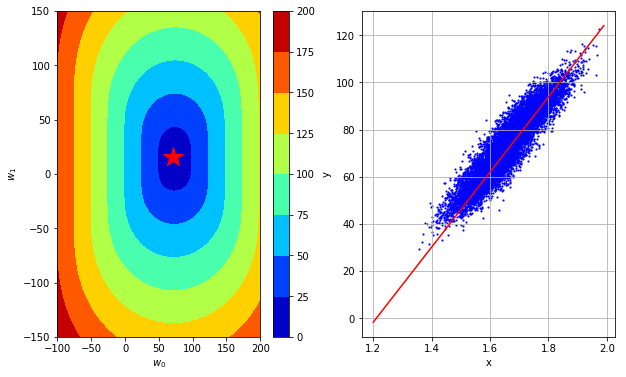

In [96]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [23]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    
    e = y - tx.dot(w)
    return -1/len(y) * np.transpose(tx).dot(e)


In [27]:
# test compute_gradient

my_y = np.array([1,2])
my_tx = np.array([[1,0],[1,1]])
print(compute_gradient(my_y, my_tx, [1,1]))  #should be [0, 0] ... OK !
print(compute_gradient(my_y, my_tx, [1,3]))  #should be [1, 1] ... OK !

print(compute_gradient(y, tx, [100,20]))
print(compute_gradient(y, tx, [50, 10]))



[-0. -0.]
[ 1.  1.]
[ 26.706078     6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [79]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y,tx,w)
        grad = compute_gradient(y,tx,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * grad 
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [87]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7 #0.7

# Initialization
#w_initial = np.array([0, 0])
w_initial = np.array([0, 0])


# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2829.2722244384163, w0=51.542590721811784, w1=10.132993413506092
Gradient Descent(1/49): loss=267.0500258779424, w0=67.00536793835532, w1=13.17289143755783
Gradient Descent(2/49): loss=36.45002800750035, w0=71.64420110331838, w1=14.084860844773326
Gradient Descent(3/49): loss=15.696028199160633, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/49): loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/49): loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/49): loss=13.644931152102242, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/49): loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(8/49): loss=13.643446931881353, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(9/49): loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
Gradient Descent(10/49): loss=13.64343490969756, w0=73.63214202236942, w1=

In [88]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

A Jupyter Widget

<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [74]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    e = y - tx.dot(w)
    return -1/len(y) * np.transpose(tx).dot(e)
    

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # compute gradient and loss
        loss = compute_loss(y,tx,w)
        grad = [0.0,0.0]

        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, 1, True): # runs only once
            grad += compute_stoch_gradient(minibatch_y,minibatch_tx,w)
        
        w = w - gamma * grad 
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("Stochastic Gradient Descent({bi}/{ti}): grad={g1},{g2}, loss={l}, w0={w0}, w1={w1}".format(
        #      bi=n_iter, ti=max_iters - 1, g1=grad[0], g2=grad[1], l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [75]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.096 seconds


In [76]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

A Jupyter Widget

<function __main__.plot_figure>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [94]:
height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)